### callback
- 모델 저장, 모델 학습 조기 중단
    - 모델 저장 : 딥러닝 모델 학습시 지정된 epochs를 다 끝내면 과대 적합되는 경우가 있다 -> 학습 중간에 일반화된 모델을 저장하는 기능
    - 모델 학습 조기 중단 : epochs 를 크게 설정한 경우 일정 횟수 이후로는 모델의 성능이 개선되지 않는 경우가 있음. 시간낭비 -> 모델의 성능이 더이상 개선되지 않는 경우에는 조기 중단이 필요

In [10]:
from tensorflow.keras.callbacks import  ModelCheckpoint, EarlyStopping
# 모델 중간 저장
# 모델 조기 중단

In [11]:
# 모델 저장 객체 생성
# 경로 설정 -> 절대경로
# 상대경로 지정을 원할 시에는 %cd 현재 작업 위치를 변경 후에 진행
model_path = r"C:\Users\chxss\OneDrive\Desktop\AiSchool\python\ML\DeepLearning\model\model_{epoch:02d}_{val_accuracy:0.3f}.keras"
mcp = ModelCheckpoint(filepath=model_path,
                        verbose= 1, # 모델 학습시 로그 출력 -> 저장되는 epoch를 표시
                        save_best_only = True, # 모델 성능이 최고점을 경신할때만 저장
                        monitor = 'val_accuracy') # 모델 성능을 확인하는 기준
                        # loss, accuracy도 가능하지만 검증데이터를 활용하는것을 추천

In [12]:
# 조기 중단 객체 생성
early = EarlyStopping(monitor='val_accuracy', # 학습을 중단할 기준 설정
                        verbose = 1, # 로그 출력
                        patience = 10) # 모델 성능 개선을 기다리는 최대 횟수
                        # 10번의 성능개선 기회를 줌

In [14]:
# 데이터 불러오기
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# relu + adam 모델 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten
from tensorflow.keras.optimizers import SGD, Adam # 최적화 함수 클래스
model3 = Sequential()
model3.add(InputLayer(shape=(28,28)))
model3.add(Flatten())
model3.add(Dense(units=64, activation='relu'))
model3.add(Dense(units=128, activation='relu'))
model3.add(Dense(units=256, activation='relu'))
model3.add(Dense(units=128, activation='relu'))
model3.add(Dense(units=64, activation='relu'))
model3.add(Dense(units=10, activation='softmax'))
# 학습방법 설정
model3.compile(loss='sparse_categorical_crossentropy',
                optimizer=Adam(), # 확률적 경사하강법
                # Adam 기본학률 :0.001
                metrics=['accuracy'])
# 모델학습
h3 = model3.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=64, callbacks = [mcp,early])

# epochs = 10


Epoch 1/100
746/750 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7560 - loss: 1.4120
Epoch 1: val_accuracy improved from -inf to 0.93067, saving model to C:\Users\chxss\OneDrive\Desktop\AiSchool\python\ML\DeepLearning\model\model_01_0.931.keras
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7567 - loss: 1.4066 - val_accuracy: 0.9307 - val_loss: 0.2480
Epoch 2/100
739/750 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9360 - loss: 0.2150
Epoch 2: val_accuracy improved from 0.93067 to 0.94450, saving model to C:\Users\chxss\OneDrive\Desktop\AiSchool\python\ML\DeepLearning\model\model_02_0.945.keras
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9361 - loss: 0.2148 - val_accuracy: 0.9445 - val_loss: 0.2047
Epoch 3/100
731/750 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9542 - loss: 0.1578
Epoch 3: val_accuracy improved from 0.94450 to 0.94758, saving model to C:\Users\chxss\OneDrive\Desktop\AiSchool\python\ML\DeepLearning\model\model_03_0.948.keras
750/750 ━━━━━━━━━━━

### 새로운 test데이터를 만들어서(직접 손글씨 만들기) 저장된 모델을 불러와서 평가

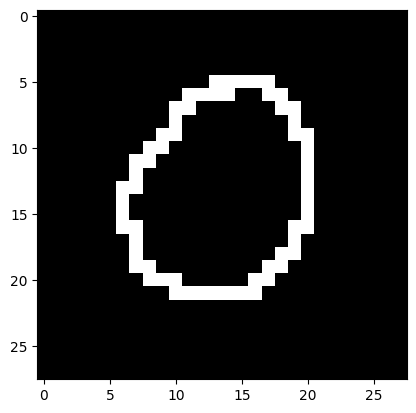

In [15]:
# 직접 작성한 손글씨 숫자 불러오기
import PIL.Image as pimg
import numpy as np
import matplotlib.pyplot as plt

# .convert('L') : 컬러이미지를 흑백이미지로 변환
img = pimg.open(r'C:\Users\chxss\OneDrive\Desktop\AiSchool\python\ML\DeepLearning\data\0.png').convert('L') 
plt.imshow(img, cmap='gray')

In [17]:
# 전처리
# 이미지데이터 -> 배열로 변환
img = np.array(img)
img.shape

(28, 28)

In [18]:
# 훈련데이터에 진행했던 Flatten 작업진행
# 2차원 -> 1차원
# (데이터개수1개, 행,열, 색상차원(흑백1))
test_img = img.reshape(1,28,28,1)
test_img = test_img.astype('float32')/255

In [35]:
# 저장한 모델 불러와서 예측
from tensorflow.keras.models import load_model
best_model = load_model(r'C:\Users\chxss\OneDrive\Desktop\AiSchool\python\ML\DeepLearning\model\model_15_0.969.keras')

In [20]:
# 예측
best_model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


array([[0.09829033, 0.0914101 , 0.09017017, 0.08599474, 0.09750927,
        0.09312163, 0.08082093, 0.1015115 , 0.14650975, 0.11466155]],
      dtype=float32)

In [21]:
# 최종 예측값만 보고싶다면?
best_model.predict(test_img).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


8

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


8

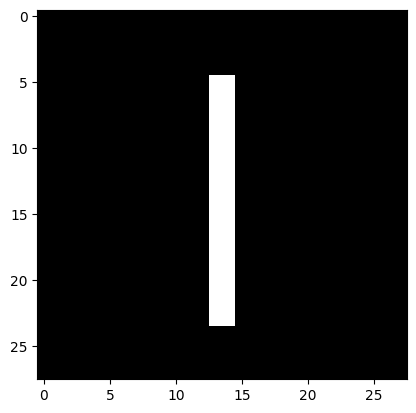

In [37]:
# .convert('L') : 컬러이미지를 흑백이미지로 변환
img1 = pimg.open(r'C:\Users\chxss\OneDrive\Desktop\AiSchool\python\ML\DeepLearning\data\1.png').convert('L') 
plt.imshow(img1, cmap='gray')
# 전처리
# 이미지데이터 -> 배열로 변환
img1 = np.array(img1)
img1.shape
# 훈련데이터에 진행했던 Flatten 작업진행
# 2차원 -> 1차원
# (데이터개수1개, 행,열, 색상차원(흑백1))
test_img1 = img1.reshape(1,28,28,1)
test_img1 = test_img1.astype('float32')/255
# 최종 예측값만 보고싶다면?
best_model.predict(test_img1).argmax()